# importing libraries

In [114]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [115]:
os.chdir("C:/Users/P NIVAS/Desktop/Remote Internship-2020/Datasets")

# importing dataset 

In [116]:

data1=pd.read_csv("cereal.csv")
data1

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [117]:
data1.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [118]:
data1.cov()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,379.630895,0.406699,9.777854,491.079973,-13.625427,20.899692,48.701299,-92.517088,115.516063,1.577239,2.040875,0.395386,-188.681562
protein,0.406699,1.198565,0.229665,-5.017943,1.305502,-0.613038,-1.601675,42.877990,0.179426,0.122010,0.035610,-0.062285,7.237560
fat,9.777854,0.229665,1.012987,-0.456254,0.040106,-1.369703,1.211552,13.867396,-0.700615,0.220950,0.032505,-0.041198,-5.786539
sodium,491.079973,-5.017943,-0.456254,7027.853725,-14.121070,127.696514,37.803315,-194.842789,677.054853,-4.865858,3.892635,2.334552,-472.571837
fiber,-13.625427,1.305502,0.040106,-14.121070,5.680424,-3.631442,-1.495899,153.485373,-1.716934,0.590379,0.088665,-0.284568,19.557575
carbo,20.899692,-0.613038,-1.369703,127.696514,-3.631442,18.309467,-6.308100,-106.665584,24.679597,-0.362611,0.087012,0.362397,3.128888
sugars,48.701299,-1.601675,1.211552,37.803315,-1.495899,-6.308100,19.757006,6.874573,12.427375,0.371668,0.301417,-0.033471,-47.433013
potass,-92.517088,42.877990,13.867396,-194.842789,153.485373,-106.665584,6.874573,5081.809638,32.967362,21.404648,4.465689,-8.215082,380.692445
vitamins,115.516063,0.179426,-0.700615,677.054853,-1.716934,24.679597,12.427375,32.967362,499.188312,5.566473,1.076940,0.667635,-75.495061
shelf,1.577239,0.122010,0.220950,-4.865858,0.590379,-0.362611,0.371668,21.404648,5.566473,0.693096,0.023898,-0.064956,0.294225


In [119]:
data1.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


In [120]:
data1.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [121]:

data1.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [122]:
data1.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [123]:
data1.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [124]:
data1['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [125]:
data1['type'].unique()

array(['C', 'H'], dtype=object)

In [126]:
data1['calories'].unique()

array([ 70, 120,  50, 110, 130,  90, 100, 140, 150, 160,  80], dtype=int64)

In [127]:
data1['protein'].unique()

array([4, 3, 2, 1, 6, 5], dtype=int64)

In [128]:
data1['fat'].unique()

array([1, 5, 0, 2, 3], dtype=int64)

In [129]:
data1['sodium'].unique()

array([130,  15, 260, 140, 200, 180, 125, 210, 220, 290, 280,  90,  80,
       190,   0, 160, 240, 135,  45, 170,  75, 250, 150,  95, 320,  70,
       230], dtype=int64)

In [130]:
data1['sugars'].unique()

array([ 6,  8,  5,  0, 10, 14, 12,  1,  9,  7, 13,  3,  2, 11, 15,  4, -1],
      dtype=int64)

In [131]:
data1['fiber'].unique()

array([10. ,  2. ,  9. , 14. ,  1. ,  1.5,  4. ,  5. ,  0. ,  3. ,  6. ,
        2.7,  2.5])

In [132]:
data1['vitamins'].unique()

array([ 25,   0, 100], dtype=int64)

In [133]:
data1['cups'].unique()

array([0.33, 1.  , 0.5 , 0.75, 0.67, 1.25, 0.8 , 0.88, 0.25, 1.33, 1.5 ,
       1.13])

In [134]:
data1['weight'].unique()

array([1.  , 1.33, 1.25, 1.3 , 1.5 , 0.5 , 0.83])

In [135]:
data1['shelf'].unique()

array([3, 1, 2], dtype=int64)

In [136]:
data1['potass'].unique()

array([280, 135, 320, 330,  -1,  70,  30, 100, 125, 190,  35, 105,  45,
        55,  25,  20,  65, 160, 120,  80, 200,  40,  85,  90,  60,  95,
       170, 130, 260,  15,  50, 110, 240, 140, 230, 115], dtype=int64)

In [137]:
data1.isnull()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [138]:
data1.any()

name        True
mfr         True
type        True
calories    True
protein     True
fat         True
sodium      True
fiber       True
carbo       True
sugars      True
potass      True
vitamins    True
shelf       True
weight      True
cups        True
rating      True
dtype: bool

#  data visualization

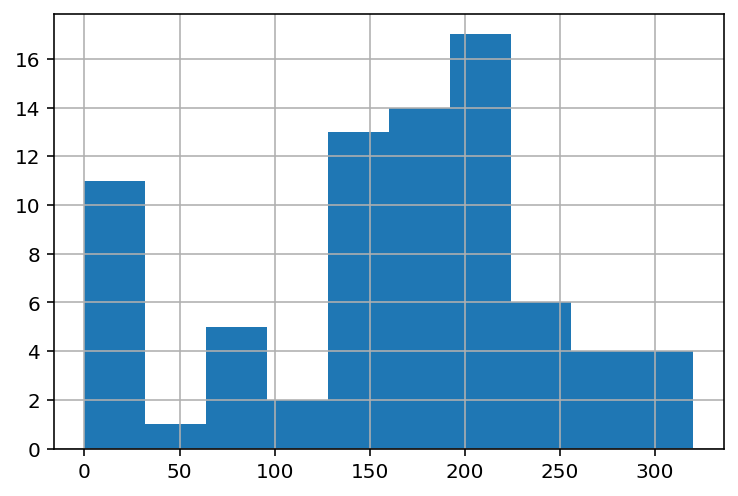

In [139]:
data1['sodium'].hist(bins=10)

In [140]:
#most of the cereals have sodium content between  130 to 220

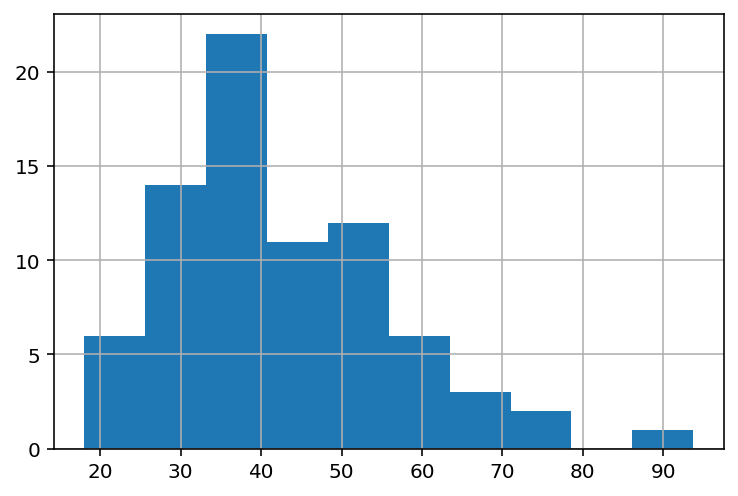

In [141]:
data1['rating'].hist(bins=10)

In [142]:
#rating is maximum in between 25 to 42

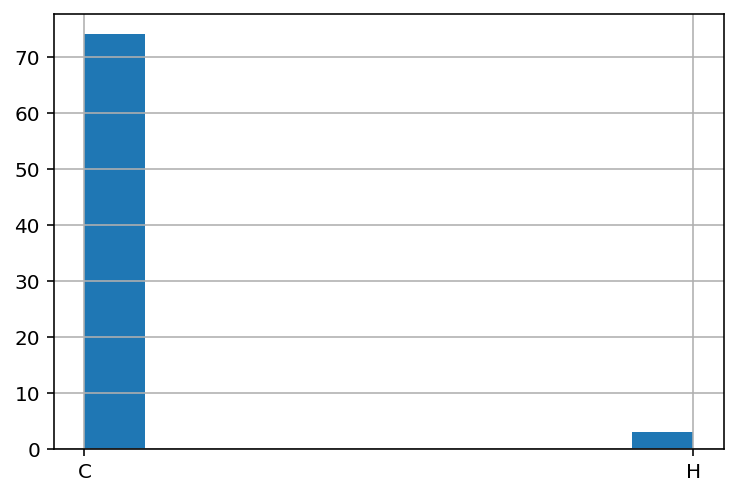

In [143]:
data1['type'].hist(bins=10)

In [144]:
#mostly the type is 'C'

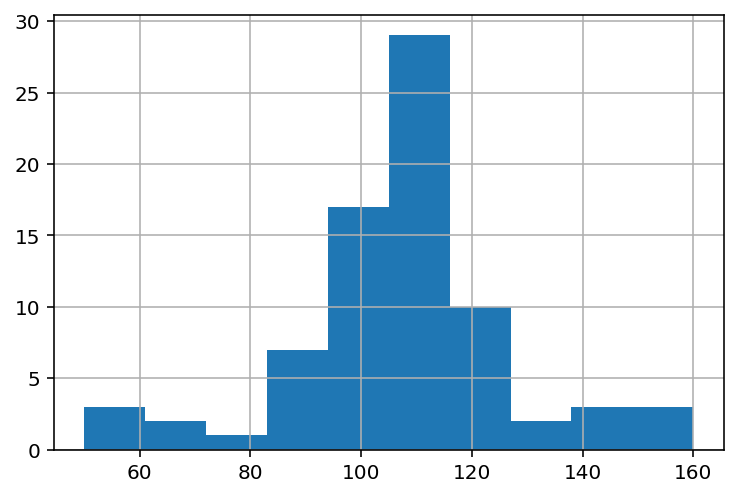

In [145]:
data1['calories'].hist(bins=10)

In [146]:
#calories are between 90 and 120

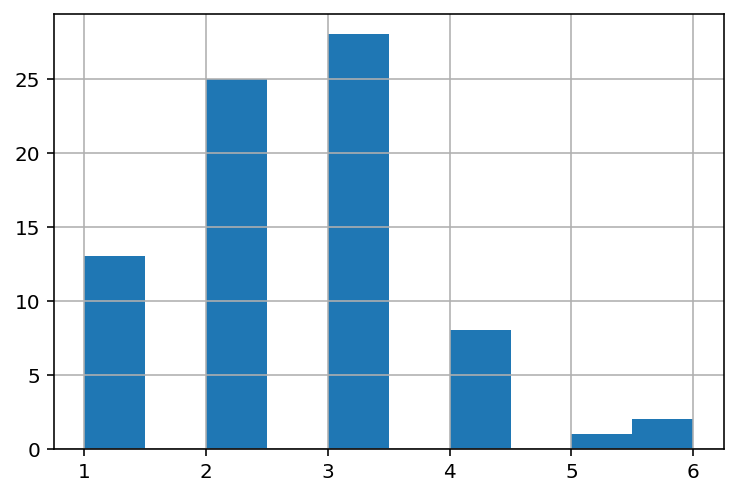

In [147]:
data1['protein'].hist(bins=10)

In [148]:
#protein value is mostly 2 and 3

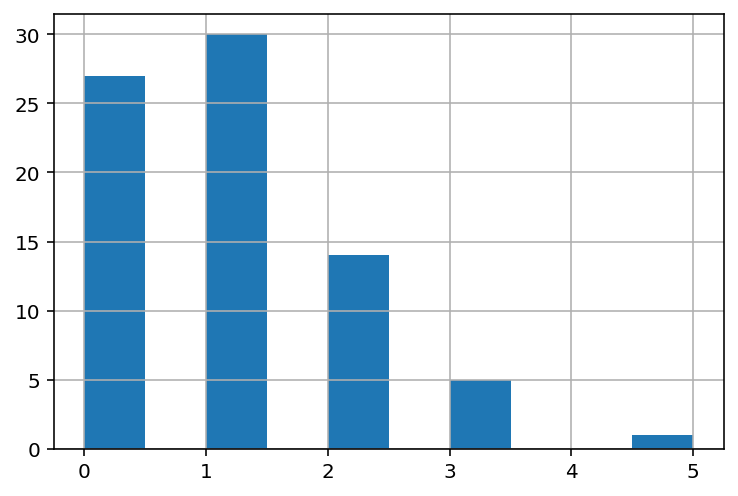

In [149]:
data1['fat'].hist(bins=10)

In [150]:
#fat is mostly 0 or 1

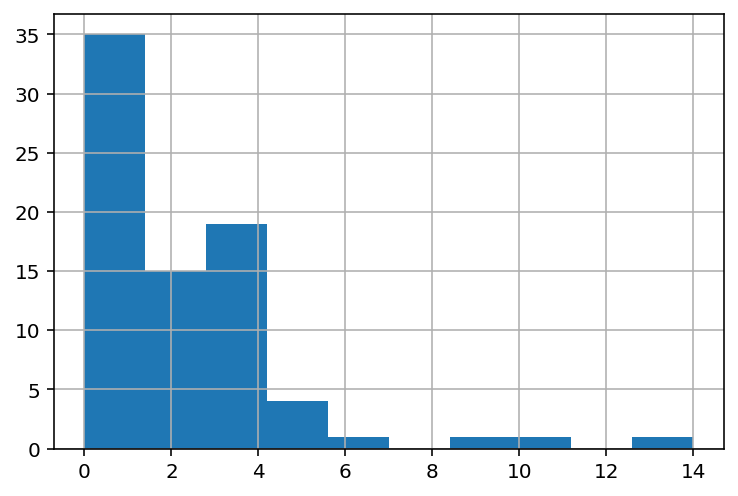

In [151]:
data1['fiber'].hist(bins=10)

In [152]:
#fiber content is in between 0 to 4

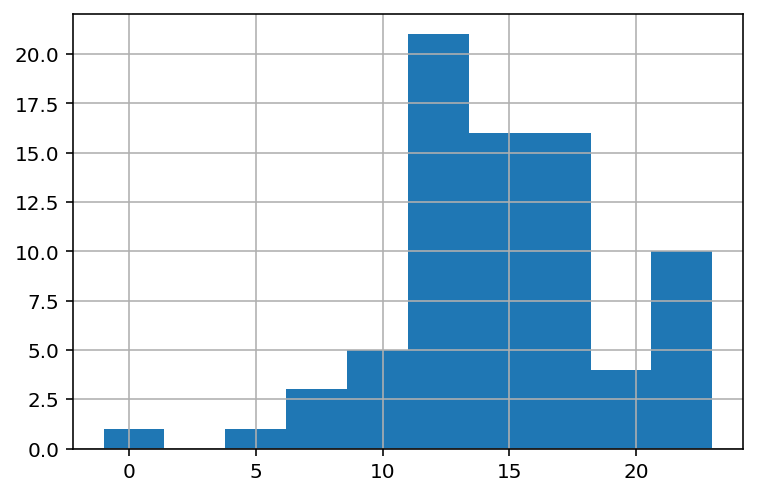

In [153]:
data1['carbo'].hist(bins=10)

In [154]:
#carbohydrates are in between 12 to 18

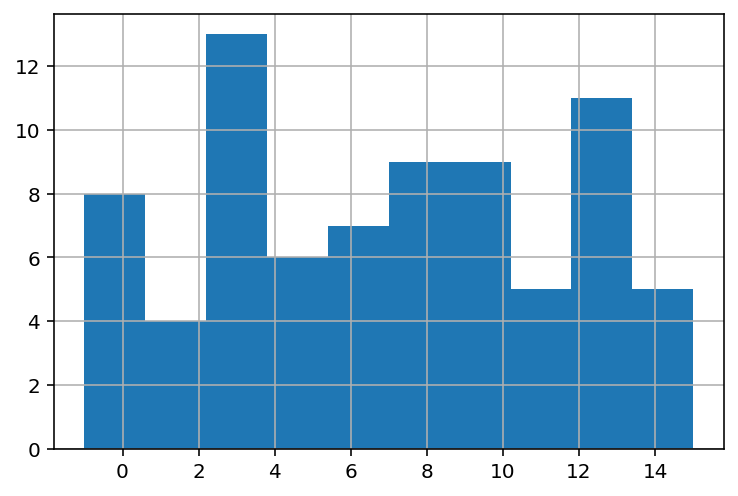

In [155]:
data1['sugars'].hist(bins=10)

In [159]:
#sugars have most at 3 and 13 

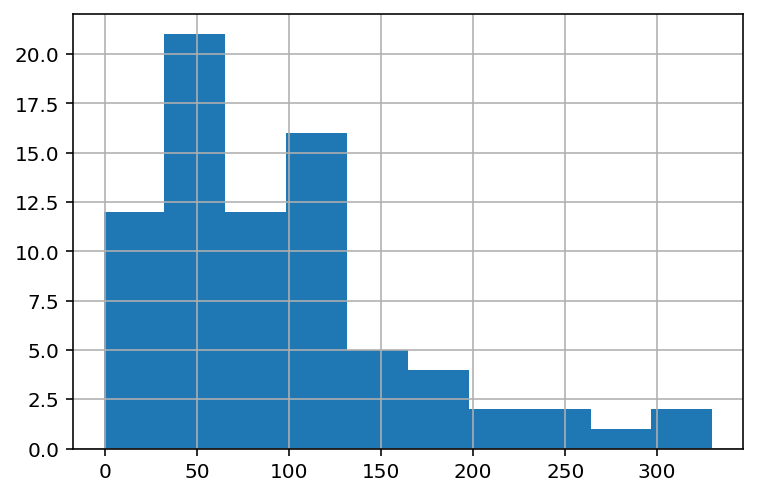

In [160]:
data1['potass'].hist(bins=10)

In [161]:
#potassium is higher at 40 to 60

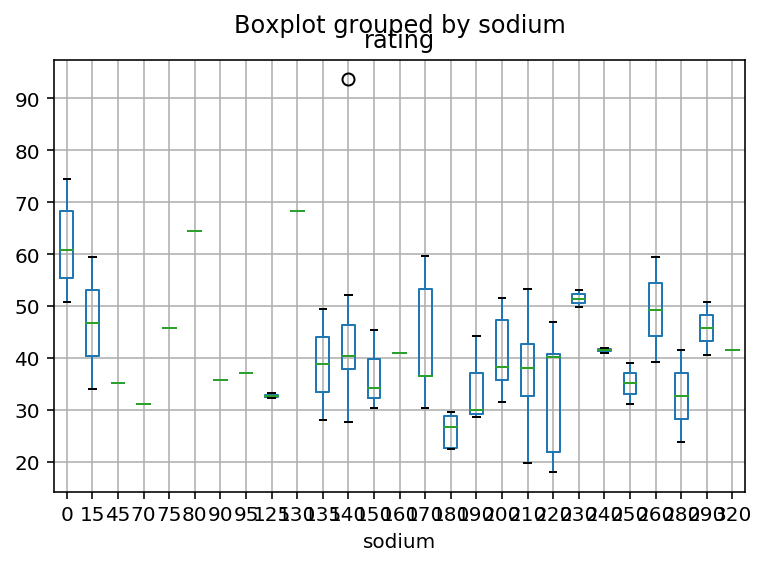

In [162]:
data1.boxplot(column='rating',by='sodium')

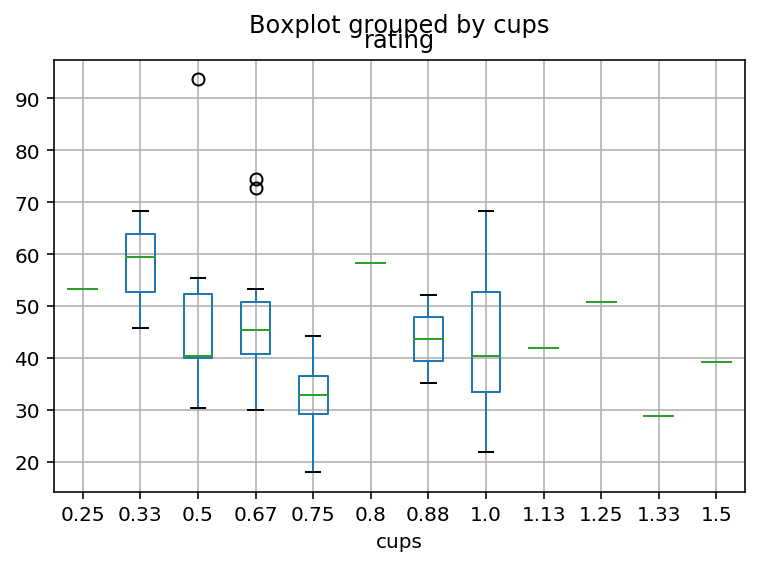

In [163]:
data1.boxplot(column='rating',by='cups')

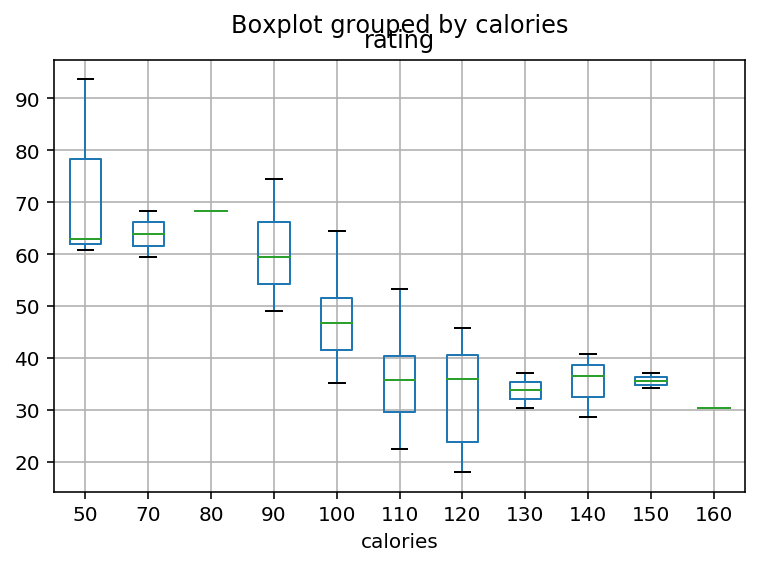

In [164]:
data1.boxplot(column='rating',by='calories')

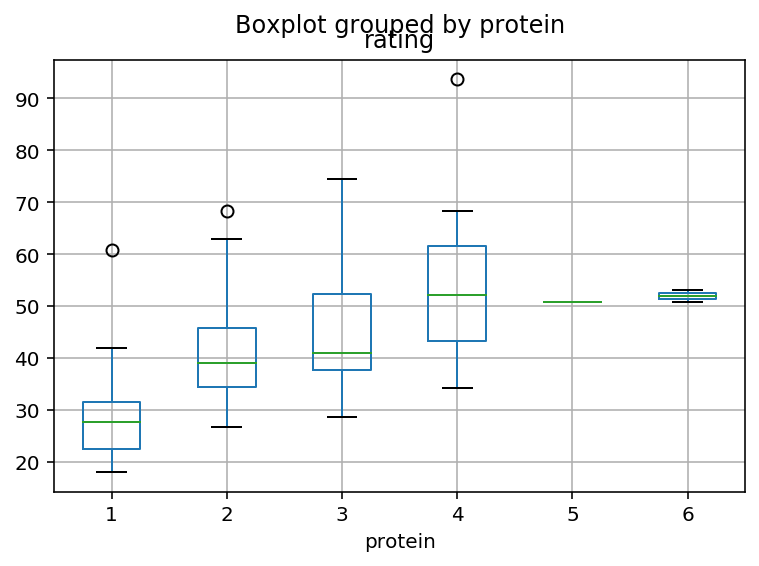

In [165]:
data1.boxplot(column='rating',by='protein')

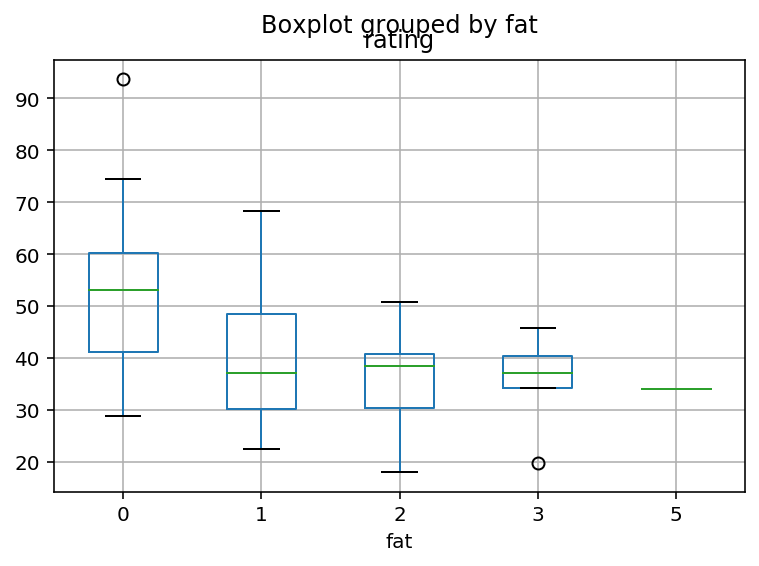

In [166]:
data1.boxplot(column='rating',by='fat')

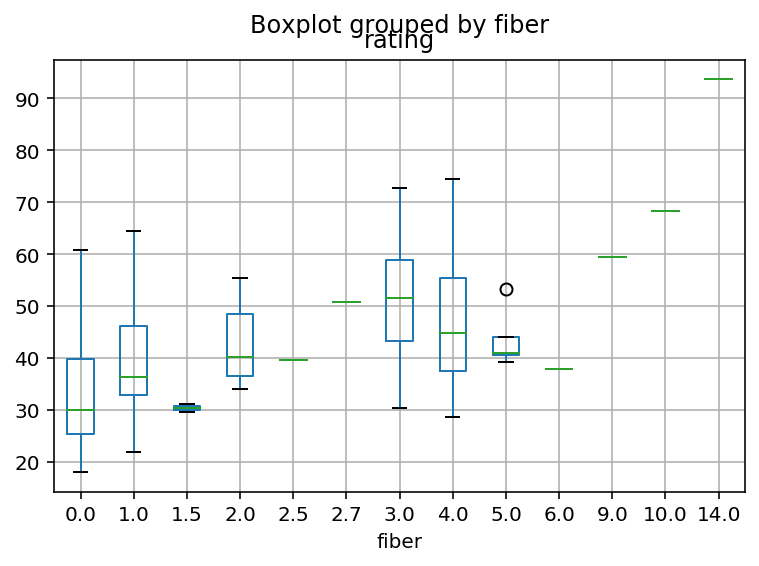

In [167]:
data1.boxplot(column='rating',by='fiber')

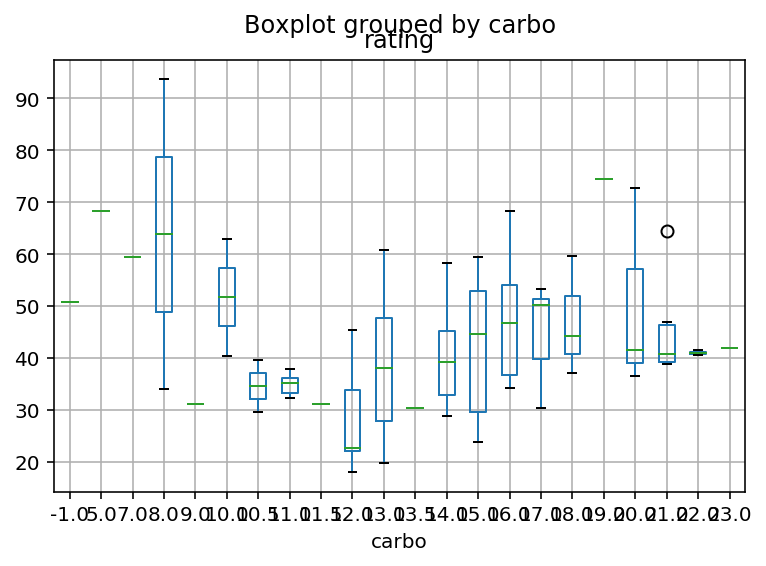

In [168]:
data1.boxplot(column='rating',by='carbo')

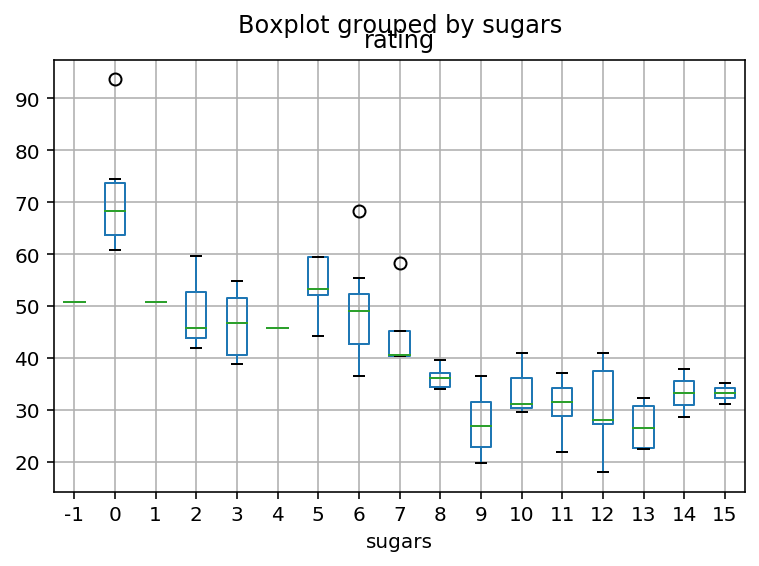

In [169]:
data1.boxplot(column='rating',by='sugars')

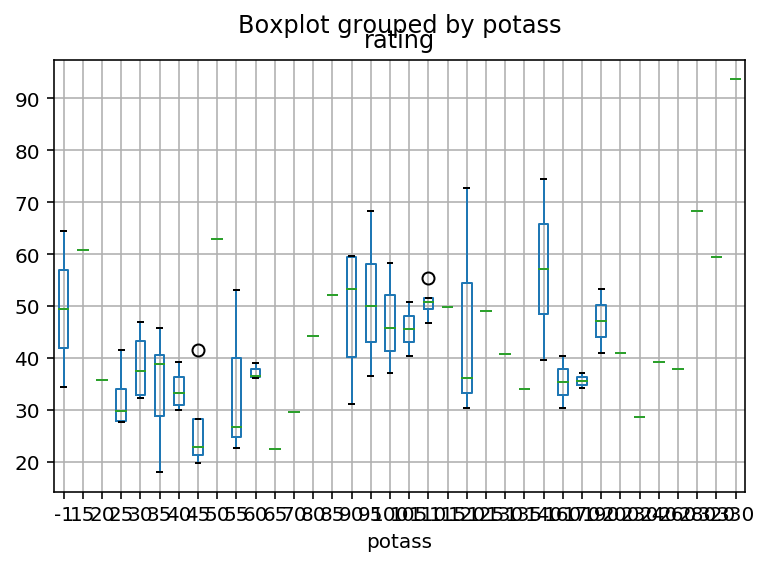

In [170]:
data1.boxplot(column='rating',by='potass')

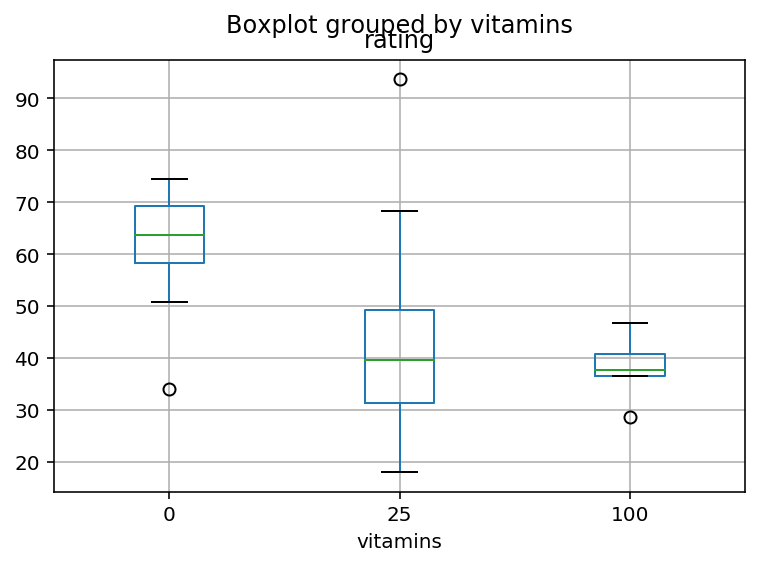

In [171]:
data1.boxplot(column='rating',by='vitamins')

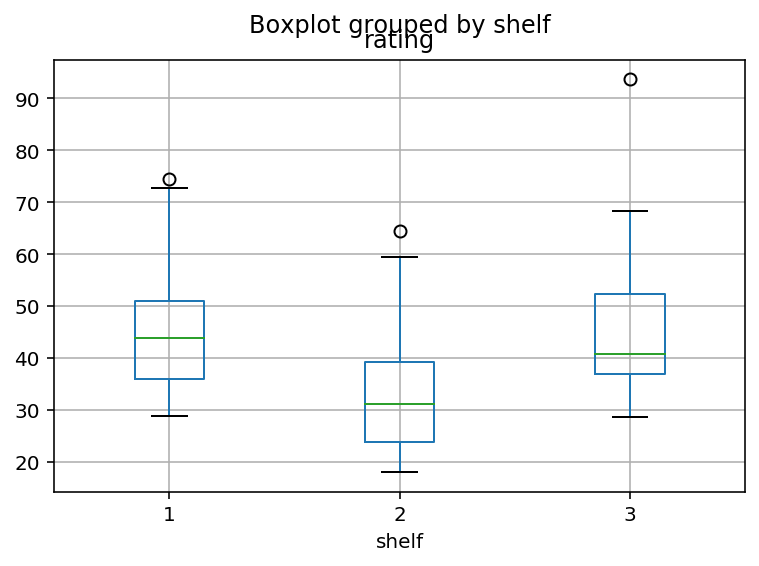

In [172]:
data1.boxplot(column='rating',by='shelf')

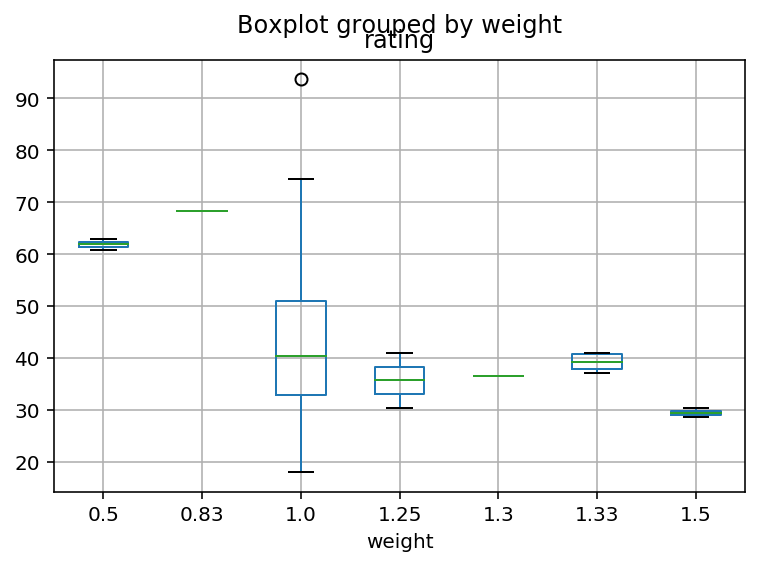

In [173]:
data1.boxplot(column='rating',by='weight')

In [174]:
#Through boxplot we can conclude that there are no outliers

# Taking Care Of Missing Data

In [175]:
data=pd.read_csv("cereal.csv")

In [176]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [177]:
data.isnull()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [178]:
data.apply(lambda x: sum(x.isnull()),axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [179]:
#from the above output, we can concluded that there are no null values, so we can cnclude that there are no missing values

In [180]:
data['type'].unique()

array(['C', 'H'], dtype=object)

In [181]:
#since 'type' has only two unique values lable encoding can be applied to it

# Label Encoding

In [182]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb2=LabelEncoder()
data['type']=lb.fit_transform(data['type'])
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,0,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,0,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,0,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,0,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


# One Hot Encoding

In [183]:
#since 'mfr' does not effect rating of cereals there is no need to encode it
#Also there are no other columns to encode, So there is no need of "One Hot Encoding"

# Feature Scaling

In [184]:
x=data.iloc[:,2:15]
x

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,0,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,0,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,0,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [185]:
y=data.iloc[:,15].values
y

array([68.402973, 33.983679, 59.425505, 93.704912, 34.384843, 29.509541,
       33.174094, 37.038562, 49.120253, 53.313813, 18.042851, 50.764999,
       19.823573, 40.400208, 22.736446, 41.445019, 45.863324, 35.782791,
       22.396513, 40.448772, 64.533816, 46.895644, 36.176196, 44.330856,
       32.207582, 31.435973, 58.345141, 40.917047, 41.015492, 28.025765,
       35.252444, 23.804043, 52.076897, 53.371007, 45.811716, 21.871292,
       31.072217, 28.742414, 36.523683, 36.471512, 39.241114, 45.328074,
       26.734515, 54.850917, 37.136863, 34.139765, 30.313351, 40.105965,
       29.924285, 40.69232 , 59.642837, 30.450843, 37.840594, 41.50354 ,
       60.756112, 63.005645, 49.511874, 50.828392, 39.259197, 39.7034  ,
       55.333142, 41.998933, 40.560159, 68.235885, 74.472949, 72.801787,
       31.230054, 53.131324, 59.363993, 38.839746, 28.592785, 46.658844,
       39.106174, 27.753301, 49.787445, 51.592193, 36.187559])

In [186]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.18181818, 0.6       , ..., 1.        , 0.5       ,
        0.064     ],
       [0.        , 0.63636364, 0.4       , ..., 1.        , 0.5       ,
        0.6       ],
       [0.        , 0.18181818, 0.6       , ..., 1.        , 0.5       ,
        0.064     ],
       ...,
       [0.        , 0.45454545, 0.4       , ..., 0.        , 0.5       ,
        0.336     ],
       [0.        , 0.45454545, 0.4       , ..., 0.        , 0.5       ,
        0.6       ],
       [0.        , 0.54545455, 0.2       , ..., 0.        , 0.5       ,
        0.4       ]])

# splitting the Dataset into Training and Test Set

In [187]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [188]:
y_train

array([41.998933, 53.131324, 31.230054, 19.823573, 30.450843, 44.330856,
       40.917047, 37.038562, 30.313351, 50.764999, 41.445019, 40.105965,
       31.072217, 63.005645, 36.471512, 35.782791, 39.106174, 27.753301,
       40.400208, 22.736446, 53.371007, 68.402973, 46.895644, 39.241114,
       60.756112, 45.328074, 58.345141, 28.025765, 37.136863, 72.801787,
       36.523683, 53.313813, 37.840594, 26.734515, 23.804043, 34.139765,
       28.592785, 39.7034  , 59.642837, 50.828392, 49.787445, 49.511874,
       54.850917, 49.120253, 74.472949, 39.259197, 59.363993, 59.425505,
       51.592193, 38.839746, 68.235885, 18.042851, 93.704912])

In [189]:
x_train

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
61,0,110,1,0,240,0.0,23.0,2,30,25,1,1.00,1.13
67,0,110,6,0,230,1.0,16.0,3,55,25,1,1.00,1.00
66,0,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75
12,0,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75
51,0,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50
23,0,100,2,0,190,1.0,18.0,5,80,25,3,1.00,0.75
27,0,120,3,2,160,5.0,12.0,10,200,25,3,1.25,0.67
7,0,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75
46,0,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67
11,0,110,6,2,290,2.0,17.0,1,105,25,1,1.00,1.25


In [190]:
y_test

array([29.924285, 40.560159, 32.207582, 31.435973, 45.811716, 33.983679,
       28.742414, 45.863324, 33.174094, 41.015492, 64.533816, 22.396513,
       55.333142, 36.187559, 29.509541, 41.50354 , 40.69232 , 36.176196,
       46.658844, 21.871292, 40.448772, 35.252444, 52.076897, 34.384843])

In [191]:
x_train

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
61,0,110,1,0,240,0.0,23.0,2,30,25,1,1.00,1.13
67,0,110,6,0,230,1.0,16.0,3,55,25,1,1.00,1.00
66,0,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75
12,0,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75
51,0,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50
23,0,100,2,0,190,1.0,18.0,5,80,25,3,1.00,0.75
27,0,120,3,2,160,5.0,12.0,10,200,25,3,1.25,0.67
7,0,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75
46,0,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67
11,0,110,6,2,290,2.0,17.0,1,105,25,1,1.00,1.25


# Training and Testing the Model

# # 1.Multiple linear Regression 

In [192]:
import statsmodels.api as sm

In [193]:
x=data[["protein","carbo","sugars","weight","calories","fat","sodium","fiber","potass"]]

In [194]:
y=data["rating"]

In [195]:
model1 = sm.OLS(y,x).fit()
predictions = model1.predict(x)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              291.1
Date:                Mon, 18 May 2020   Prob (F-statistic):                    1.15e-50
Time:                        18:54:41   Log-Likelihood:                         -260.62
No. Observations:                  77   AIC:                                      539.2
Df Residuals:                      68   BIC:                                      560.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
protein        5.0030      1.244      4.022      0.000       2.521       7.485
carbo          1.7017      0.412      4.126      0.000       0.879       2.525
sugars        -0.6156      0.448     -1.374      0.174      -1.510       0.279
weight        39.0185     11.653      3.348      0.001      15.766      62.271
calories      -0.1846      0.141     -1.309      0.195      -0.466       0.097
fat           -0.9960      1.508     -0.660      0.511      -4.006       2.014
sodium        -0.0718      0.012     -6.173      0.000      -0.095      -0.049
fiber          5.5682      1.030      5.408      0.000       3.514       7.623
potass        -0.1196      0.035     -3.422      0.001      -0.189      -0.050
==============================================================================
Omnibus:                       13.115   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               45.161
Skew:                           0.150   Prob(JB):                     1.56e-10
Kurtosis:                       6.740   Cond. No.                     3.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [197]:
x_train

,protein,carbo,sugars,weight,calories,fat,sodium,fiber,potass
62,2,22.0,3,1.00,110,0,290,0.0,35
35,1,12.0,11,1.00,120,2,220,1.0,45
38,2,17.0,6,1.00,110,1,170,1.0,60
55,2,10.0,0,0.50,50,0,0,1.0,50
33,3,17.0,3,1.00,110,0,170,3.0,90
67,6,16.0,3,1.00,110,0,230,1.0,55
40,2,21.0,3,1.00,110,1,260,0.0,40
21,2,21.0,3,1.00,110,0,220,1.0,30
68,2,15.0,5,1.00,90,0,15,3.0,90
3,4,8.0,0,1.00,50,0,140,14.0,330


In [198]:
y_train

62    40.560159
35    21.871292
38    36.523683
55    63.005645
33    53.371007
67    53.131324
40    39.241114
21    46.895644
68    59.363993
3     93.704912
44    37.136863
56    49.511874
39    36.471512
47    40.105965
24    32.207582
8     49.120253
17    35.782791
0     68.402973
69    38.839746
48    29.924285
7     37.038562
73    27.753301
52    37.840594
13    40.400208
22    36.176196
32    52.076897
30    35.252444
49    40.692320
41    45.328074
54    60.756112
23    44.330856
4     34.384843
66    31.230054
14    22.736446
29    28.025765
28    41.015492
42    26.734515
60    55.333142
11    50.764999
65    72.801787
18    22.396513
20    64.533816
50    59.642837
25    31.435973
6     33.174094
1     33.983679
16    45.863324
64    74.472949
5     29.509541
9     53.313813
72    39.106174
12    19.823573
37    28.742414
Name: rating, dtype: float64

In [199]:
x_test

,protein,carbo,sugars,weight,calories,fat,sodium,fiber,potass
31,1,15.0,9,1.00,110,1,280,0.0,45
43,4,16.0,3,1.00,100,1,0,0.0,95
26,3,14.0,7,1.00,100,0,0,3.0,100
74,3,17.0,3,1.00,100,1,230,3.0,115
58,3,14.0,12,1.33,120,1,210,5.0,240
59,3,10.5,8,1.00,100,2,140,2.5,140
61,1,23.0,2,1.00,110,0,240,0.0,30
51,3,13.5,10,1.25,130,2,170,1.5,120
36,3,11.5,10,1.00,110,1,250,1.5,90
57,5,-1.0,-1,1.00,100,2,0,2.7,110


In [200]:
y_test

31    23.804043
43    54.850917
26    58.345141
74    49.787445
58    39.259197
59    39.703400
61    41.998933
51    30.450843
36    31.072217
57    50.828392
10    18.042851
53    41.503540
34    45.811716
2     59.425505
71    46.658844
27    40.917047
46    30.313351
15    41.445019
45    34.139765
19    40.448772
76    36.187559
70    28.592785
63    68.235885
75    51.592193
Name: rating, dtype: float64

In [201]:
# define the data/predictors as the pre-set feature names  
features = x_train.iloc[:,:].values

In [202]:
features

array([[  2.  ,  22.  ,   3.  ,   1.  , 110.  ,   0.  , 290.  ,   0.  ,
         35.  ],
       [  1.  ,  12.  ,  11.  ,   1.  , 120.  ,   2.  , 220.  ,   1.  ,
         45.  ],
       [  2.  ,  17.  ,   6.  ,   1.  , 110.  ,   1.  , 170.  ,   1.  ,
         60.  ],
       [  2.  ,  10.  ,   0.  ,   0.5 ,  50.  ,   0.  ,   0.  ,   1.  ,
         50.  ],
       [  3.  ,  17.  ,   3.  ,   1.  , 110.  ,   0.  , 170.  ,   3.  ,
         90.  ],
       [  6.  ,  16.  ,   3.  ,   1.  , 110.  ,   0.  , 230.  ,   1.  ,
         55.  ],
       [  2.  ,  21.  ,   3.  ,   1.  , 110.  ,   1.  , 260.  ,   0.  ,
         40.  ],
       [  2.  ,  21.  ,   3.  ,   1.  , 110.  ,   0.  , 220.  ,   1.  ,
         30.  ],
       [  2.  ,  15.  ,   5.  ,   1.  ,  90.  ,   0.  ,  15.  ,   3.  ,
         90.  ],
       [  4.  ,   8.  ,   0.  ,   1.  ,  50.  ,   0.  , 140.  ,  14.  ,
        330.  ],
       [  4.  ,  16.  ,  11.  ,   1.  , 150.  ,   3.  ,  95.  ,   3.  ,
        170.  ],
       [  4.  ,  14. 

In [203]:
labels = y_train.iloc[:].values

In [204]:
labels

array([40.560159, 21.871292, 36.523683, 63.005645, 53.371007, 53.131324,
       39.241114, 46.895644, 59.363993, 93.704912, 37.136863, 49.511874,
       36.471512, 40.105965, 32.207582, 49.120253, 35.782791, 68.402973,
       38.839746, 29.924285, 37.038562, 27.753301, 37.840594, 40.400208,
       36.176196, 52.076897, 35.252444, 40.69232 , 45.328074, 60.756112,
       44.330856, 34.384843, 31.230054, 22.736446, 28.025765, 41.015492,
       26.734515, 55.333142, 50.764999, 72.801787, 22.396513, 64.533816,
       59.642837, 31.435973, 33.174094, 33.983679, 45.863324, 74.472949,
       29.509541, 53.313813, 39.106174, 19.823573, 28.742414])

In [205]:
x=features
y=labels

In [206]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(x,y) 

In [207]:
predictions = model.predict(x)

In [208]:
#Check model accuracy
accuracy=model.score(x,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.9962784823800274


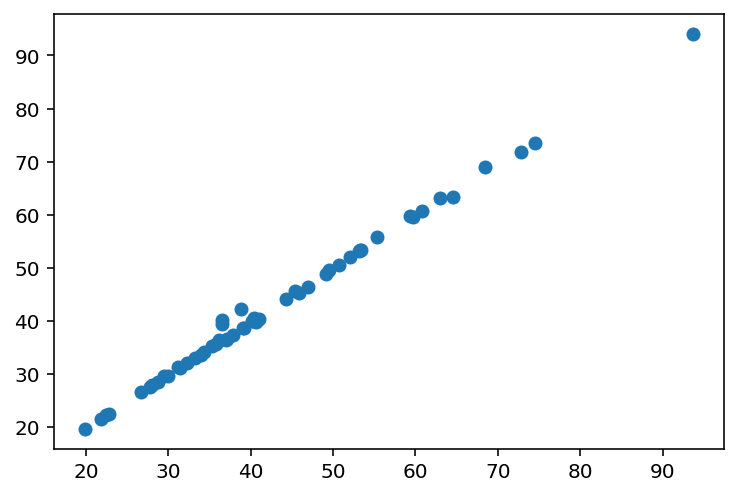

In [209]:
#Visualize the predictions
plt.scatter(y, predictions)

In [210]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score

# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")


import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Slope: [ 3.25267733  0.9687589  -0.82599157  0.2670213  -0.22021012 -1.77012439
 -0.05686131  3.32050372 -0.03200827]
Intercept: 56.13910432927289


The model performance
--------------------------------------
RMSE is 0.9061697670109299
R2 score is 0.9962784823800273




# # 2.Decision Tree Regression

In [216]:
x=data[["protein","carbo","sugars","weight","calories","fat","sodium","fiber","potass"]].values
y=data.iloc[:,15].values

In [217]:
x

array([[  4.  ,   5.  ,   6.  ,   1.  ,  70.  ,   1.  , 130.  ,  10.  ,
        280.  ],
       [  3.  ,   8.  ,   8.  ,   1.  , 120.  ,   5.  ,  15.  ,   2.  ,
        135.  ],
       [  4.  ,   7.  ,   5.  ,   1.  ,  70.  ,   1.  , 260.  ,   9.  ,
        320.  ],
       [  4.  ,   8.  ,   0.  ,   1.  ,  50.  ,   0.  , 140.  ,  14.  ,
        330.  ],
       [  2.  ,  14.  ,   8.  ,   1.  , 110.  ,   2.  , 200.  ,   1.  ,
         -1.  ],
       [  2.  ,  10.5 ,  10.  ,   1.  , 110.  ,   2.  , 180.  ,   1.5 ,
         70.  ],
       [  2.  ,  11.  ,  14.  ,   1.  , 110.  ,   0.  , 125.  ,   1.  ,
         30.  ],
       [  3.  ,  18.  ,   8.  ,   1.33, 130.  ,   2.  , 210.  ,   2.  ,
        100.  ],
       [  2.  ,  15.  ,   6.  ,   1.  ,  90.  ,   1.  , 200.  ,   4.  ,
        125.  ],
       [  3.  ,  13.  ,   5.  ,   1.  ,  90.  ,   0.  , 210.  ,   5.  ,
        190.  ],
       [  1.  ,  12.  ,  12.  ,   1.  , 120.  ,   2.  , 220.  ,   0.  ,
         35.  ],
       [  6.  ,  17. 

In [218]:
y

array([68.402973, 33.983679, 59.425505, 93.704912, 34.384843, 29.509541,
       33.174094, 37.038562, 49.120253, 53.313813, 18.042851, 50.764999,
       19.823573, 40.400208, 22.736446, 41.445019, 45.863324, 35.782791,
       22.396513, 40.448772, 64.533816, 46.895644, 36.176196, 44.330856,
       32.207582, 31.435973, 58.345141, 40.917047, 41.015492, 28.025765,
       35.252444, 23.804043, 52.076897, 53.371007, 45.811716, 21.871292,
       31.072217, 28.742414, 36.523683, 36.471512, 39.241114, 45.328074,
       26.734515, 54.850917, 37.136863, 34.139765, 30.313351, 40.105965,
       29.924285, 40.69232 , 59.642837, 30.450843, 37.840594, 41.50354 ,
       60.756112, 63.005645, 49.511874, 50.828392, 39.259197, 39.7034  ,
       55.333142, 41.998933, 40.560159, 68.235885, 74.472949, 72.801787,
       31.230054, 53.131324, 59.363993, 38.839746, 28.592785, 46.658844,
       39.106174, 27.753301, 49.787445, 51.592193, 36.187559])

In [219]:
#Fit Decision Tree Rgerssion Model to the dataset
from sklearn.tree import DecisionTreeRegressor
#Create the Decision Tree regressor object 
regressor = DecisionTreeRegressor(random_state=0)

In [223]:
#Fit the regressor object to the dataset.
regressor.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [232]:
#Predict a new result
y_pred = regressor.predict([[6,6,9,1,72,1.2,13,10.2,81]])

In [236]:
print("rating is:",y_pred)

rating is: [41.015492]
